<a href="https://colab.research.google.com/github/hogyunkim/pocket/blob/main/5_Random_Forest%EB%A1%9C_%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data = pd.read_csv('https://raw.githubusercontent.com/DSNote/taling_data/main/car.csv')

In [137]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [139]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


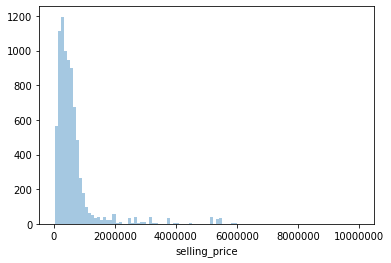

In [140]:
# selling_price 분포확인

sns.distplot(data['selling_price'], bins = 100, kde = False) # bins = 막대의 갯수, kde = 곡선 제거
plt.ticklabel_format(style = 'plain', axis = 'both') # 그래프의 자잘한부분을 바꿀땐 plt사용

#텍스트데이터 숫자형으로 변환

In [141]:
data[['engine', 'unit']] = data['engine'].str.split(expand = True) # split은 띄어쓰기가 기본값 
                                                                   # expand =True -> 데이터 프레임으로 생성

In [142]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248,74 bhp,190Nm@ 2000rpm,5.0,CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0,CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,CC


In [143]:
data.info() # 변수타입 제대로 변환됐는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  unit           7907 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 889.1+ KB


In [144]:
pd.to_numeric(data['engine']) # numeric -> 숫자형태로 바꿈, datetime -> 시간형태로 바꿈

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8128, dtype: float64

In [145]:
data['engine'] = pd.to_numeric(data['engine'])

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  unit           7907 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [147]:
data.drop(['unit'], axis = 1, inplace = True)

In [148]:
data[['max_power', 'max_power_unit']] = data['max_power'].str.split(expand = True)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   float64
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [150]:
data[data['max_power'] =='bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


In [151]:
data['max_power'] = data['max_power'].replace('bhp', np.nan) # replace -> 특정 값을 결측값으로 바꾸는 방법

In [152]:
data[data['max_power'] =='bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit


In [153]:
data['max_power'] = data['max_power'].astype('float64') # astype 지정한 타입으로 변환

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   float64
 10  max_power       7912 non-null   float64
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 889.1+ KB


In [155]:
data['max_power_unit'].unique()

array(['bhp', nan, None], dtype=object)

In [156]:
data[data['max_power_unit'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
data[['mileage', 'mileage_unit']] = data['mileage'].str.split(expand = True)

In [158]:
data['mileage'] = data['mileage'].astype('float64')

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   float64
 9   engine          7907 non-null   float64
 10  max_power       7912 non-null   float64
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
 14  mileage_unit    7907 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 952.6+ KB


In [160]:
data['mileage_unit'].value_counts() # 연료의 형태에 따라 단위가 다름

kmpl     7819
km/kg      88
Name: mileage_unit, dtype: int64

In [161]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [162]:
80.43
73.56
40.85
44.23

44.23

In [163]:
def mile(x):
  if x['fuel'] == 'Petrol':
    return x['mileage'] / 80.43
  elif x['fuel'] == 'Diesel':
    return x['mileage'] / 73.56
  elif x['fuel'] == 'LPG' :
    return x['mileage'] / 40.85
  else:
    return x['mileage'] / 44.23

In [164]:
data['mileage'] = data.apply(mile, axis =1)

In [165]:
data.drop('mileage_unit', axis = 1, inplace = True)

In [166]:
data['torque'] = data['torque'].str.upper()

In [167]:
def torque_unit(x):
  if 'NM' in str(x):
    return 'NM'
  elif 'KGM' in str(x):
    return 'KGM'

In [168]:
data['torque_unit'] = data['torque'].apply(torque_unit)

In [169]:
data[data['torque_unit'].isna()]['torque'].unique()

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [170]:
data[data['torque_unit'].isna()]['torque'].unique()

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [171]:
data['torque_unit'].fillna('NM', inplace = True)

In [172]:
example_str = '250@ 1250-5000RPM'

In [173]:
for i in example_str:
  if i not in '0123456789':
    print(i)

@
 
-
R
P
M


In [174]:
def split_num(x):
  x = str(x)
  for index, value in enumerate(x):
    if value not in '0123456789':
      cut = index
      break
  return x[:cut]

In [175]:
data['torque'] = data['torque'].apply(split_num)

In [176]:
for i in data['torque'].unique():
  if i.isnumeric(): # i의 구성요소가 숫자인지 확인 (알파벳은 isalpha)
    continue
  else:
    x = i

In [177]:
data['torque'] = data['torque'].replace('', np.NaN) # 빈 문자열 결측값으로 변환

In [178]:
data['torque'] = data['torque'].astype('float64')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   float64
 9   engine          7907 non-null   float64
 10  max_power       7912 non-null   float64
 11  torque          7906 non-null   float64
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
 14  torque_unit     8128 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 952.6+ KB


In [180]:
def torque_trans(x):
  if x['torque_unit'] == 'KGM':
    return x['torque'] * 9.8066
  else:
    return x['torque']

In [181]:
data['torque'] = data.apply(torque_trans, axis = 1)

In [182]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit,torque_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.0000,5.0,bhp,NM
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.0000,5.0,bhp,NM
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,117.6792,5.0,bhp,KGM
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,215.7452,5.0,bhp,KGM
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,107.8726,5.0,bhp,KGM


In [183]:
data.drop('torque_unit', axis = 1, inplace = True)

In [185]:
data.drop('max_power_unit', axis = 1, inplace = True)

In [186]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.0000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.0000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,117.6792,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,215.7452,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,107.8726,5.0


In [187]:
data['name'] = data['name'].str.split(expand = True)[0]

In [188]:
data['name'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: name, dtype: int64

In [189]:
data.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
dtype: float64

In [190]:
len(data)

8128

In [191]:
len(data.dropna())

7906

In [192]:
data = data.dropna()

In [193]:
data.isna().mean()

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
torque           0.0
seats            0.0
dtype: float64

In [194]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.0000,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.0000,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,117.6792,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,215.7452,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,107.8726,5.0


In [195]:
for i in ['name', 'fuel', 'seller_type', 'transmission', 'owner']:
  print(i, data[i].nunique())

name 31
fuel 4
seller_type 3
transmission 2
owner 5


In [196]:
data = pd.get_dummies(data, columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first = True)

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis =1), data['selling_price'], test_size = 0.2, random_state = 100)

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
rf = RandomForestRegressor(random_state = 100)

In [201]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [202]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [203]:
from sklearn.metrics import mean_squared_error

In [204]:
mse = mean_squared_error  

In [205]:
mse(y_train, train_pred, squared = False)

53603.55115849563

In [206]:
mse(y_test, test_pred, squared = False)

131075.95288985566

In [207]:
# Random Forest의 원리
# 1. Bagging으로 인해 모든 관측치를 사용하지 않는다
# 2. 모든 피처를 사용하지는 않는다.(중요도가 높은 피쳐가 주로 상위 노드에 존재 -> 굳이 중요도가 낮은 피처를 쓸 이유X)
# 3. 각 트리는 독립적이다(n번째 트리는 n-1개의 트리가 관여하는 바가 없음 -> 서로 별개의 프로세스로 생성)

In [208]:
# Overfittion 개선, 느린 속도

In [209]:
# 종합된 시각화 어려움
from sklearn.tree import plot_tree

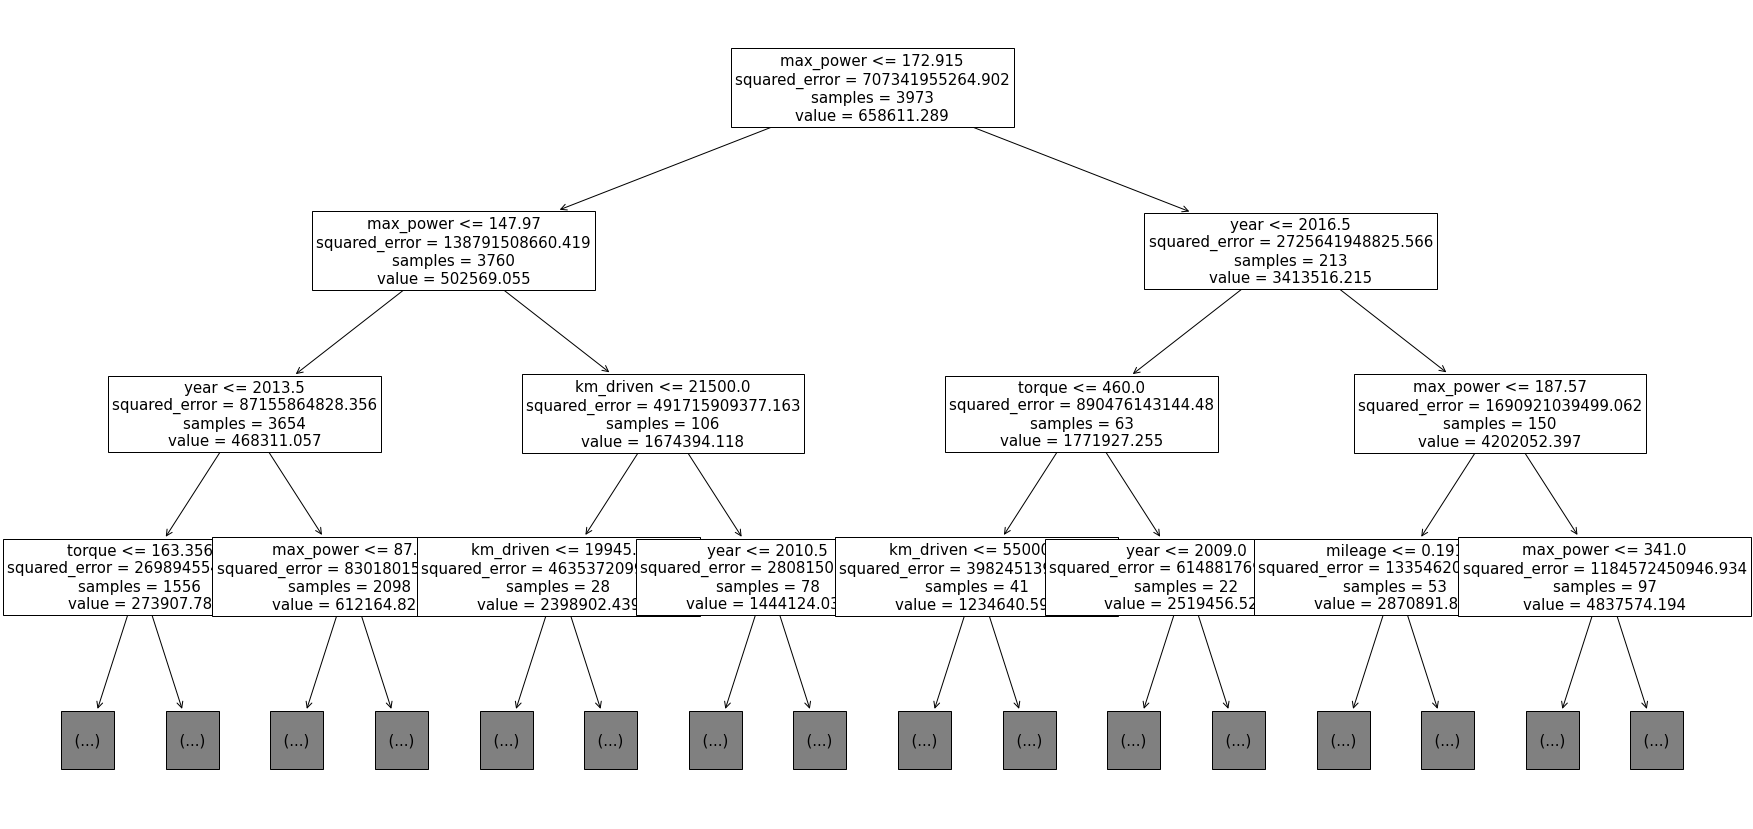

In [210]:
plt.figure(figsize = (30, 15))
plot_tree(rf.estimators_[10], max_depth = 3, fontsize = 15, feature_names = X_train.columns)
plt.show()

In [211]:
# 변수 중요도
round(pd.Series(rf.feature_importances_, index = X_train.columns), 2).sort_values(ascending = False)

max_power                       0.72
year                            0.18
torque                          0.03
km_driven                       0.02
mileage                         0.01
engine                          0.01
seller_type_Individual          0.01
name_Volkswagen                 0.00
name_Mitsubishi                 0.00
name_Nissan                     0.00
name_Opel                       0.00
name_Renault                    0.00
name_Skoda                      0.00
name_Tata                       0.00
name_Toyota                     0.00
fuel_LPG                        0.00
name_Volvo                      0.00
fuel_Diesel                     0.00
name_Maruti                     0.00
fuel_Petrol                     0.00
seller_type_Trustmark Dealer    0.00
transmission_Manual             0.00
owner_Fourth & Above Owner      0.00
owner_Second Owner              0.00
owner_Test Drive Car            0.00
name_Mercedes-Benz              0.00
name_Lexus                      0.00
n

In [212]:
# Cross Validation = 평가 결과를 좀더 신뢰할 수 있도록 테스트 셋을 여러번 예측하여 평균을 내는 방법

In [213]:
# 데이터를 얼마나 잘게 쪼갤것인가? K-Fold
# 최대한 train셋 데이터를 확보해야함
# 큰 데이터 -> test size 커도 가능, 작은 데이터 -> train 셋 충분해야 함

In [214]:
from sklearn.model_selection import KFold

In [215]:
kf = KFold(n_splits = 5)

In [216]:
for i, j in kf.split(data):
  print(i, j)

[1582 1583 1584 ... 7903 7904 7905] [   0    1    2 ... 1579 1580 1581]
[   0    1    2 ... 7903 7904 7905] [1582 1583 1584 ... 3160 3161 3162]
[   0    1    2 ... 7903 7904 7905] [3163 3164 3165 ... 4741 4742 4743]
[   0    1    2 ... 7903 7904 7905] [4744 4745 4746 ... 6322 6323 6324]
[   0    1    2 ... 6322 6323 6324] [6325 6326 6327 ... 7903 7904 7905]


In [217]:
X = data.drop('selling_price', axis = 1)
y = data['selling_price']

In [218]:
train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  rf_cv = RandomForestRegressor(random_state = 100)
  rf_cv.fit(X_train, y_train)

  train_pred = rf_cv.predict(X_train)
  test_pred = rf_cv.predict(X_test)

  train_rmse = mse(y_train, train_pred, squared = False)
  test_rmse = mse(y_test, test_pred, squared = False)

  train_rmse_list.append(train_rmse)
  test_rmse_list.append(test_rmse)

In [219]:
test_rmse_list

[161527.6116761578,
 135190.01630243138,
 122250.03923777258,
 151645.83866742265,
 144341.3683660992]

In [220]:
train_rmse_list

[50986.75730041469,
 59060.323713414975,
 57868.59538320345,
 55877.76146077998,
 59246.05975273191]

In [221]:
sum(test_rmse_list)/5

142990.97484997672

In [222]:
rf = RandomForestRegressor(random_state = 100, max_features = 'sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=100)

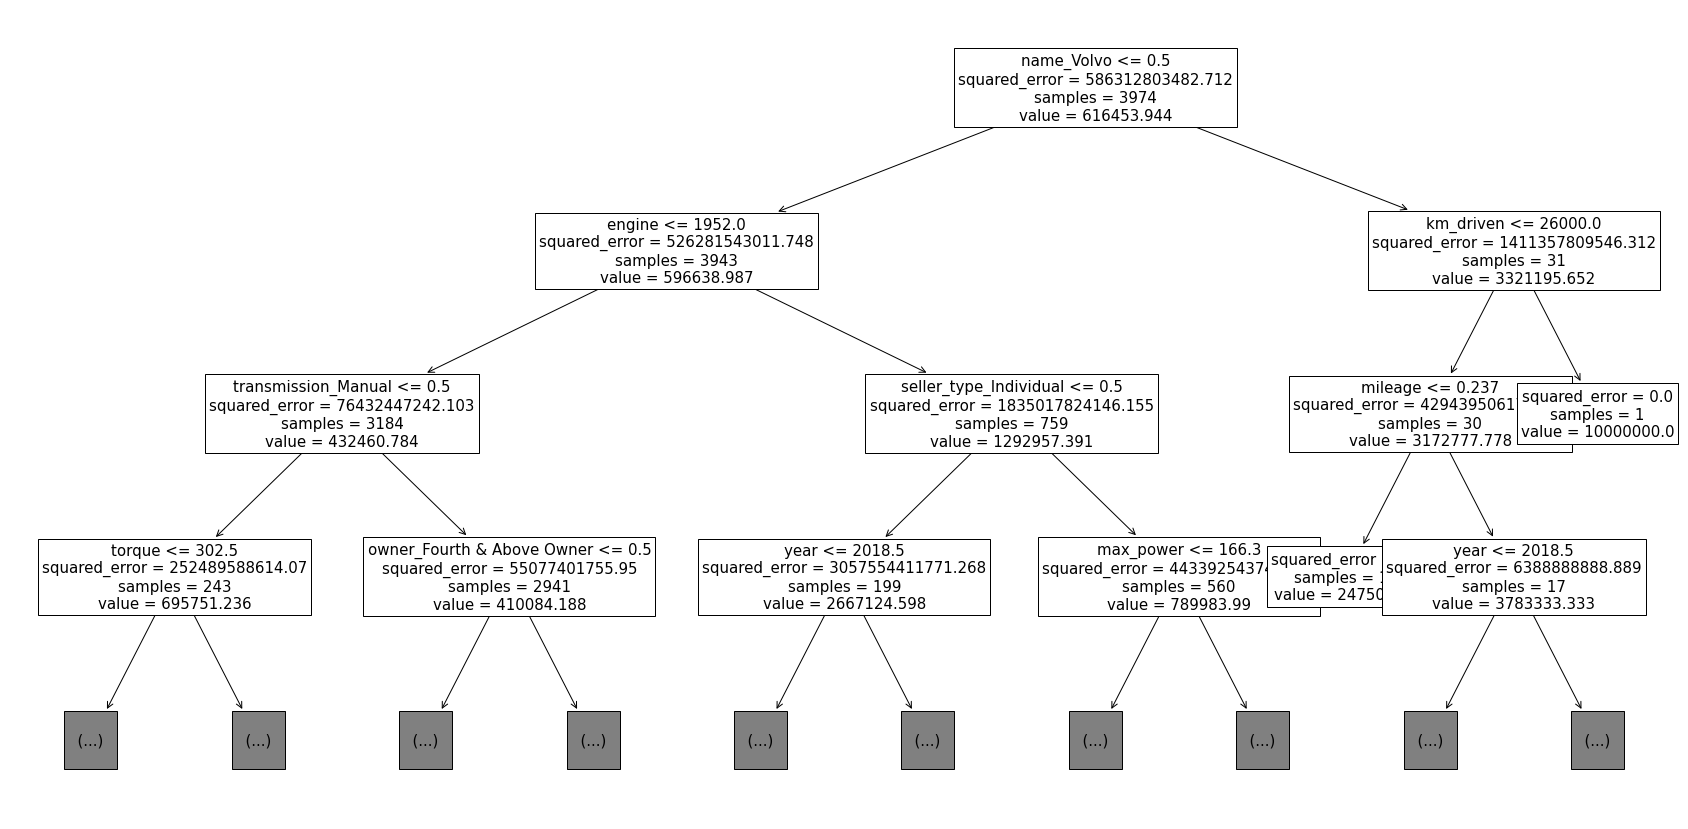

In [223]:
plt.figure(figsize = (30, 15))
plot_tree(rf.estimators_[10], max_depth = 3, fontsize = 15, feature_names = X_train.columns)
plt.show()

In [224]:
train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  rf_cv = RandomForestRegressor(random_state = 100, max_features = 'sqrt', max_depth = 10, n_estimators = 300, min_samples_split = 3)
  rf_cv.fit(X_train, y_train)

  train_pred = rf_cv.predict(X_train)
  test_pred = rf_cv.predict(X_test)

  train_rmse = mse(y_train, train_pred, squared = False)
  test_rmse = mse(y_test, test_pred, squared = False)

  train_rmse_list.append(train_rmse)
  test_rmse_list.append(test_rmse)

In [225]:
sum(test_rmse_list)/5

181318.4379504262

In [226]:
def plus_ten(x):
  return x + 10

In [227]:
plus_ten(10)

20

In [228]:
def multipl(x, y):
  return x * y

In [229]:
multipl(2, 10)

20

In [230]:
sample_df = pd.DataFrame({'a' : [1,2,3,4,5], 'b' : ['one', 'two', 'three', 'four', 'five'],
                          'c' : [1,2, 'three', 4,5], 'd' : [0,0,0,1,1]})

In [231]:
sample_df

,a,b,c,d
0,1,one,1,0
1,2,two,2,0
2,3,three,three,0
3,4,four,4,1
4,5,five,5,1


In [232]:
plus_ten(sample_df['a'])

0    11
1    12
2    13
3    14
4    15
Name: a, dtype: int64

In [233]:
sample_df['a'].apply(plus_ten)

0    11
1    12
2    13
3    14
4    15
Name: a, dtype: int64

In [234]:
sample_df['a'].map(plus_ten)

0    11
1    12
2    13
3    14
4    15
Name: a, dtype: int64

In [235]:
sample_df['d'].map({0: 10, 1: 20})

0    10
1    10
2    10
3    20
4    20
Name: d, dtype: int64

In [236]:
sample_df

,a,b,c,d
0,1,one,1,0
1,2,two,2,0
2,3,three,three,0
3,4,four,4,1
4,5,five,5,1


In [237]:
def even_plus_ten(x):
  if x['a'] % 2 == 1:
    return x['d'] + 10
  else:
    return x['d']

In [238]:
sample_df.apply(even_plus_ten, axis = 1)

0    10
1     0
2    10
3     1
4    11
dtype: int64

In [239]:
sample_df

,a,b,c,d
0,1,one,1,0
1,2,two,2,0
2,3,three,three,0
3,4,four,4,1
4,5,five,5,1


In [240]:
sample_df[['a', 'd']].apply(plus_ten)

,a,d
0,11,10
1,12,10
2,13,10
3,14,11
4,15,11


In [241]:
def new_multi(x, y = 3):
  return x * y

In [242]:
new_multi(5)

15

In [243]:
new_multi(4, 7)

28

In [244]:
def temp(x, y = 10):
  x = x + 10
  y = y - 3
  return (x, y)

In [245]:
temp(5)

(15, 7)

In [246]:
temp(6, 9)

(16, 6)

In [247]:
temp(y = 9, x = 6)

(16, 6)

In [248]:
def plus_ten_try(x):
  try:
    return x + 10
  except:
    return 'not a number'

In [249]:
sample_df['c'].apply(plus_ten_try)

0              11
1              12
2    not a number
3              14
4              15
Name: c, dtype: object